In [1]:
# Importing libs and aliasing them
import tensorflow 
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Conv2D, \
                         Flatten, MaxPooling2D


import pandas as pds
import librosa.display
import random
import numpy as npy #number handling
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as mtplt

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


# Reading the content from the csv file

In [2]:
# Reading the Data and its format
data = pds.read_csv(r'UrbanSound8K.tar\UrbanSound8K\metadata\UrbanSound8K.csv')
data.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [3]:
data.shape #finding the shape of input matrix (row * column)

(8732, 8)

In [4]:
# Extracting data that is only three seconds long for the possible and efficient implementation
required_data = data[['slice_file_name', 'fold' ,'classID', 'class']][ data['end']-data['start'] >= 3 ]
required_data.shape

(7468, 4)

# Spectrogram representation of all the categories

In [5]:
path = 'UrbanSound8K.tar\\UrbanSound8K\\audio\\'

In [6]:
# Representation of a dog barking mel spectrogram
#y_value, sr_value = librosa.load(r'UrbanSound8K.tar\UrbanSound8K\audio\fold1\7383-3-0-1.wav', duration=2.97)
y_value, sr_value = librosa.load(path + 'fold1\\7383-3-0-1.wav', duration=2.97)
graph_output = librosa.feature.melspectrogram(y=y_value, sr=sr_value)
graph_output.shape

(128, 128)

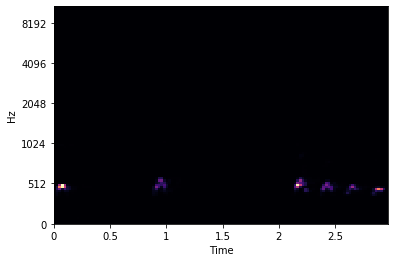

In [7]:
librosa.display.specshow(graph_output, y_axis='mel', x_axis='time')

In [8]:
# Representation of a street music mel spectrogram
y_value, sr_value = librosa.load(path + 'fold2\\14780-9-0-1.wav', duration=2.97)
graph_output = librosa.feature.melspectrogram(y=y_value, sr=sr_value)
graph_output.shape

(128, 128)

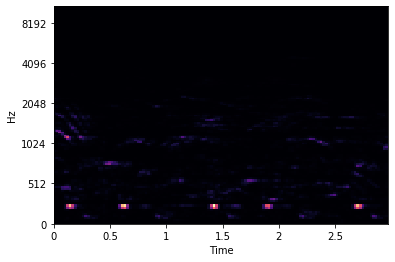

In [9]:
librosa.display.specshow(graph_output, y_axis='mel', x_axis='time')

In [10]:
# Representation of a siren mel spectrogram
y_value, sr_value = librosa.load(path + 'fold3\\184623-8-0-1.wav', duration=2.97)
graph_output = librosa.feature.melspectrogram(y=y_value, sr=sr_value)
graph_output.shape

(128, 128)

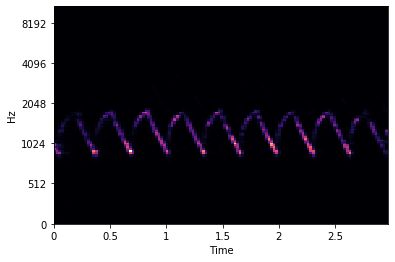

In [11]:
librosa.display.specshow(graph_output, y_axis='mel', x_axis='time')

In [12]:
# Representation of a car horn spectrogram
y_value, sr_value = librosa.load(path + 'fold3\\9674-1-0-0.wav', duration=2.97)
graph_output = librosa.feature.melspectrogram(y=y_value, sr=sr_value)
graph_output.shape

(128, 128)

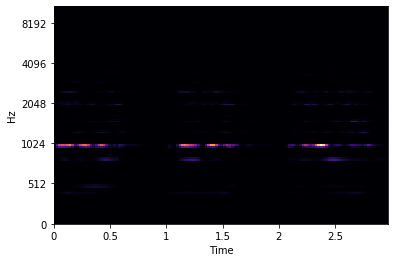

In [13]:
librosa.display.specshow(graph_output, y_axis='mel', x_axis='time')

In [14]:
# Representation of an air-conditioner spectrogram
y_value, sr_value = librosa.load(path + 'fold6\\204240-0-0-1.wav', duration=2.97)
graph_output = librosa.feature.melspectrogram(y=y_value, sr=sr_value)
graph_output.shape

(128, 128)

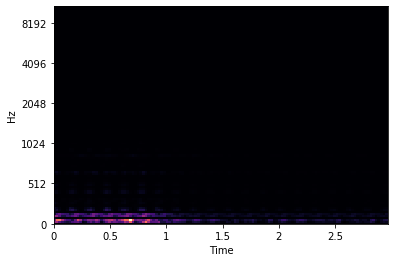

In [15]:
librosa.display.specshow(graph_output, y_axis='mel', x_axis='time')

In [16]:
# Representation of children playing spectrogram
y_value, sr_value = librosa.load(path + 'fold3\\9223-2-0-4.wav', duration=2.97)
graph_output = librosa.feature.melspectrogram(y=y_value, sr=sr_value)
graph_output.shape

(128, 128)

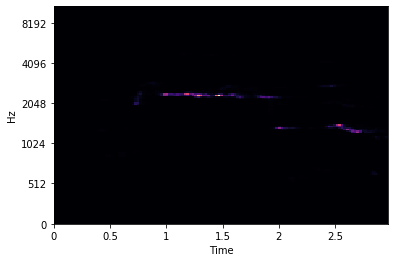

In [17]:
librosa.display.specshow(graph_output, y_axis='mel', x_axis='time')

In [18]:
# Representation of an engine idling spectrogram
y_value, sr_value = librosa.load(path + 'fold5\\17578-5-0-18.wav', duration=2.97)
graph_output = librosa.feature.melspectrogram(y=y_value, sr=sr_value)
graph_output.shape

(128, 128)

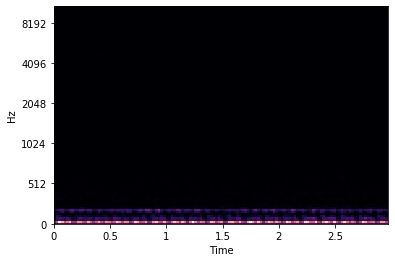

In [19]:
librosa.display.specshow(graph_output, y_axis='mel', x_axis='time')

In [20]:
# Representation of a drilling spectrogram
y_value, sr_value = librosa.load(path + 'fold3\\37560-4-0-1.wav', duration=2.97)
graph_output = librosa.feature.melspectrogram(y=y_value, sr=sr_value)
graph_output.shape

(128, 128)

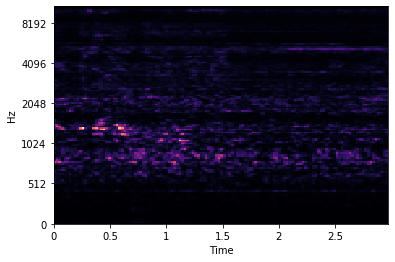

In [21]:
librosa.display.specshow(graph_output, y_axis='mel', x_axis='time')

In [22]:
# Representation of a jack hammer spectrogram
y_value, sr_value = librosa.load(path + 'fold7\\177537-7-0-10.wav', duration=2.97)
graph_output = librosa.feature.melspectrogram(y=y_value, sr=sr_value)
graph_output.shape

(128, 128)

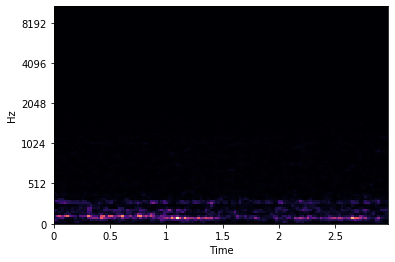

In [23]:
librosa.display.specshow(graph_output, y_axis='mel', x_axis='time')

In [24]:
# Representation of a gun shot spectrogram
y_value, sr_value = librosa.load(path + 'fold2\\35800-6-0-0.wav', duration=2.97)
graph_output = librosa.feature.melspectrogram(y=y_value, sr=sr_value)
graph_output.shape

(128, 128)

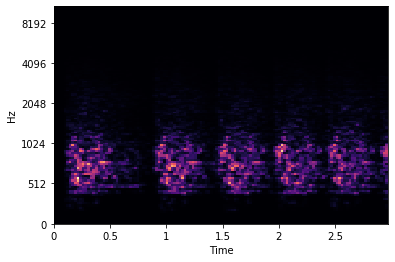

In [25]:
librosa.display.specshow(graph_output, y_axis='mel', x_axis='time')

In [26]:
required_data['path'] = 'fold' + required_data['fold'].astype('str') + '/' + required_data['slice_file_name'].astype('str')

In [27]:
DS = [] # Dataset to hold the shaped values

for row in required_data.itertuples():
    y, sr = librosa.load(path + row.path, duration=2.97)  
    ps = librosa.feature.melspectrogram(y=y, sr=sr)
    if ps.shape != (128, 128): continue
    DS.append( (ps, row.classID) )

In [28]:
print("Number of samples: ", len(DS))

Number of samples:  7467


# Defining the test and train strategies

In [29]:
dataset = DS
random.shuffle(dataset)

train = dataset[:5974]  #segregation 1 to 5974
test = dataset[5974:] #5974 onwards

X_train, y_train = zip(*train)
X_test, y_test = zip(*test)

# Reshape for CNN input
X_train = npy.array([x.reshape( (128, 128, 1) ) for x in X_train])
X_test = npy.array([x.reshape( (128, 128, 1) ) for x in X_test])

# One-Hot encoding for classes
y_train = npy.array(keras.utils.to_categorical(y_train, 10))
y_test = npy.array(keras.utils.to_categorical(y_test, 10))


# Defining the CNN layers 

In [30]:
model = Sequential()
input_shape=(128, 128, 1)

model.add(Conv2D(24, (5, 5), strides=(1, 1), input_shape=input_shape))
model.add(MaxPooling2D((4, 2), strides=(4, 2)))
model.add(Activation('relu'))

model.add(Conv2D(48, (5, 5), padding="valid"))
model.add(MaxPooling2D((4, 2), strides=(4, 2)))
model.add(Activation('relu'))

model.add(Conv2D(48, (5, 5), padding="valid"))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dropout(rate=0.2))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(rate=0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

# Compiling and testing the model

In [31]:
model.compile(
    optimizer="Adam",
    loss="categorical_crossentropy",
    metrics=['accuracy'])

history = model.fit(
    x=X_train, 
    y=y_train,
    epochs=35,
    batch_size=128,
    validation_data= (X_test, y_test))

score = model.evaluate(
    x=X_test,
    y=y_test)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 5974 samples, validate on 1493 samples
Epoch 1/35
5974/5974 [==============================] - 92s 15ms/step - loss: 2.3623 - accuracy: 0.2402 - val_loss: 2.0417 - val_accuracy: 0.3583
Epoch 2/35
5974/5974 [==============================] - 91s 15ms/step - loss: 1.8761 - accuracy: 0.3688 - val_loss: 1.7174 - val_accuracy: 0.4153
Epoch 3/35
5974/5974 [==============================] - 91s 15ms/step - loss: 1.5662 - accuracy: 0.4531 - val_loss: 1.5755 - val_accuracy: 0.4675
Epoch 4/35
5974/5974 [==============================] - 90s 15ms/step - loss: 1.4416 - accuracy: 0.4854 - val_loss: 1.4763 - val_accuracy: 0.5198
Epoch 5/35
5974/5974 [==============================] - 91s 15ms/step - loss: 1.3370 - accuracy: 0.5375 - val_loss: 1.3025 - val_accuracy: 0.5881
Epoch 6/35
5974/5974 [==============================] - 91s 15ms/step - loss: 1.1704 - accuracy: 0.5877 - val_loss: 1.2395 - val_accuracy: 0.6269
Epoch 7/35
5974/5974 [==============================] - 92s 15ms/step - loss

In [32]:
score = model.evaluate(X_train, y_train, verbose=0)
print("Net Training Accuracy observed: ", score[1])

Net Training Accuracy observed:  0.9295279383659363


# Plotting Confusion Matrix

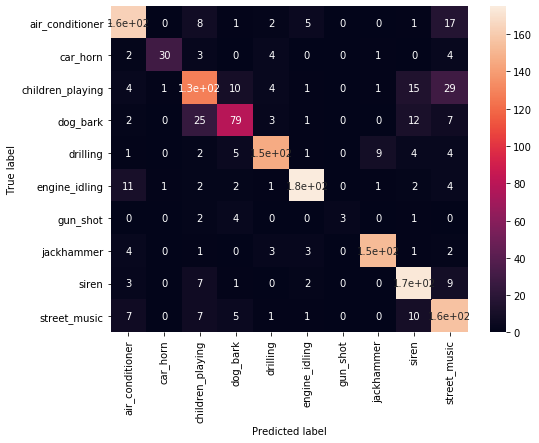

In [33]:
import seaborn as sns
y_pred = model.predict(X_test)
cm =confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
cm_df = pds.DataFrame(cm,
                     index = ['air_conditioner','car_horn','children_playing','dog_bark','drilling','engine_idling','gun_shot','jackhammer','siren','street_music'], 
                     columns = ['air_conditioner','car_horn','children_playing','dog_bark','drilling','engine_idling','gun_shot','jackhammer','siren','street_music'])

mtplt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True)
mtplt.ylabel('True label')
mtplt.xlabel('Predicted label')
mtplt.show()

# Implementing Augmentation

In [34]:
rate = 0.81 # can be replaced with 1.07 and executed again

for row in required_data.itertuples():
    y, sr = librosa.load('UrbanSound8K.tar/UrbanSound8K/audio/' + row.path)  
    y_changed = librosa.effects.time_stretch(y, rate=rate)
    librosa.output.write_wav('UrbanSound8K.tar/UrbanSound8K/augmented/fold' + str(row.fold) + '/speed_' + str(int(rate*100)) + '/' + row.slice_file_name ,y_changed, sr)

In [35]:
n_steps = 2 #-1, -2, 2, 1

for row in required_data.itertuples():
    y, sr = librosa.load('UrbanSound8K.tar/UrbanSound8K/audio/' + row.path)  
    y_changed = librosa.effects.pitch_shift(y, sr, n_steps=n_steps)
    librosa.output.write_wav('UrbanSound8K.tar/UrbanSound8K/augmented/fold' + str(row.fold) + '/ps1_' + str(int(n_steps)) + '/' + row.slice_file_name ,y_changed, sr)

In [36]:
n_steps = 2.5 #-2.5, -3.5, 2.5, 3.5

for row in required_data.itertuples():
    y, sr = librosa.load('UrbanSound8K.tar/UrbanSound8K/audio/' + row.path)  
    y_changed = librosa.effects.pitch_shift(y, sr, n_steps=n_steps)
    librosa.output.write_wav('UrbanSound8K.tar/UrbanSound8K/augmented/fold' + str(row.fold) + '/ps2_' + str(int(n_steps*10)) + '/' + row.slice_file_name ,y_changed, sr)

In [37]:
required_data['path1'] =  '/' + required_data['slice_file_name'].astype('str')
for row in required_data.itertuples():
    y, sr = librosa.load('UrbanSound8K.tar/UrbanSound8K/augmented/fold' +  str(row.fold) + '/ps1_2' + row.path1 , duration=2.97)  
    ps = librosa.feature.melspectrogram(y=y, sr=sr)
    if ps.shape != (128, 128): continue
    DS.append( (ps, row.classID) )

In [38]:
len(DS)

14934

In [39]:
required_data['path1'] =  '/' + required_data['slice_file_name'].astype('str')

for row in required_data.itertuples():
    y, sr = librosa.load('UrbanSound8K.tar/UrbanSound8K/augmented/fold' +  str(row.fold) + '/ps2_25' + row.path1 , duration=2.97)  
    ps = librosa.feature.melspectrogram(y=y, sr=sr)
    if ps.shape != (128, 128): continue
    DS.append( (ps, row.classID) )    

In [40]:
len(DS)

22401

In [41]:
for row in required_data.itertuples():
    y, sr = librosa.load('UrbanSound8K.tar/UrbanSound8K/augmented/fold' +  str(row.fold) + '/speed_81' + row.path1 , duration=2.97)  
    ps = librosa.feature.melspectrogram(y=y, sr=sr)
    if ps.shape != (128, 128): continue
    DS.append( (ps, row.classID) )

In [42]:
len(DS)

29869

# Checking the dataset count now

In [43]:
print("The number of samples are: ", len(DS))

The number of samples are:  29869


# Recompiling and testing the model to get an enhanced efficiency

In [44]:
dataset = DS
random.shuffle(dataset)

train = dataset[:26000]  #segregation 1 to 26000
test = dataset[26000:] #26000 onwards

X_train, y_train = zip(*train)
X_test, y_test = zip(*test)

# Reshape for CNN input
X_train = npy.array([x.reshape( (128, 128, 1) ) for x in X_train])
X_test = npy.array([x.reshape( (128, 128, 1) ) for x in X_test])

# One-Hot encoding for classes
y_train = npy.array(keras.utils.to_categorical(y_train, 10))
y_test = npy.array(keras.utils.to_categorical(y_test, 10))


In [45]:
model = Sequential()
input_shape=(128, 128, 1)

model.add(Conv2D(24, (5, 5), strides=(1, 1), input_shape=input_shape))
model.add(MaxPooling2D((4, 2), strides=(4, 2)))
model.add(Activation('relu'))

model.add(Conv2D(48, (5, 5), padding="valid"))
model.add(MaxPooling2D((4, 2), strides=(4, 2)))
model.add(Activation('relu'))

model.add(Conv2D(48, (5, 5), padding="valid"))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dropout(rate=0.2))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(rate=0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

In [46]:
model.compile(
    optimizer="Adam",
    loss="categorical_crossentropy",
    metrics=['accuracy'])

history1 = model.fit(
    x=X_train, 
    y=y_train,
    epochs=35,
    batch_size=128,
    validation_data= (X_test, y_test))

score1 = model.evaluate(
    x=X_test,
    y=y_test)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 26000 samples, validate on 3869 samples
Epoch 1/35
26000/26000 [==============================] - 488s 19ms/step - loss: 1.9307 - accuracy: 0.3285 - val_loss: 1.4795 - val_accuracy: 0.4745
Epoch 2/35
26000/26000 [==============================] - 488s 19ms/step - loss: 1.4056 - accuracy: 0.5012 - val_loss: 1.2951 - val_accuracy: 0.5299
Epoch 3/35
26000/26000 [==============================] - 688s 26ms/step - loss: 1.1483 - accuracy: 0.6021 - val_loss: 1.0653 - val_accuracy: 0.6542
Epoch 4/35
26000/26000 [==============================] - 499s 19ms/step - loss: 0.9609 - accuracy: 0.6693 - val_loss: 0.8450 - val_accuracy: 0.7340
Epoch 5/35
26000/26000 [==============================] - 441s 17ms/step - loss: 0.8425 - accuracy: 0.7134 - val_loss: 1.0779 - val_accuracy: 0.6521
Epoch 6/35
26000/26000 [==============================] - 439s 17ms/step - loss: 0.7507 - accuracy: 0.7469 - val_loss: 0.7726 - val_accuracy: 0.7361
Epoch 7/35
26000/26000 [==============================] -

In [47]:
score_aug = model.evaluate(X_train, y_train, verbose=0)
print("Net Training Accuracy observed: ", score_aug[1])

Net Training Accuracy observed:  0.950615406036377


# Plotting the confusion matrix 

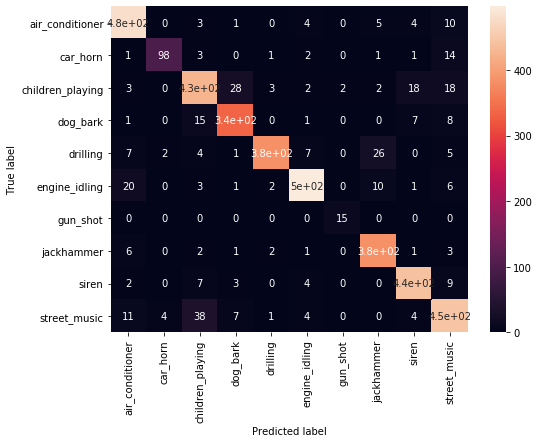

In [48]:
import seaborn as sns
y_pred = model.predict(X_test)
cm =confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
cm_df = pds.DataFrame(cm,
                     index = ['air_conditioner','car_horn','children_playing','dog_bark','drilling','engine_idling','gun_shot','jackhammer','siren','street_music'], 
                     columns = ['air_conditioner','car_horn','children_playing','dog_bark','drilling','engine_idling','gun_shot','jackhammer','siren','street_music'])

mtplt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True)
mtplt.ylabel('True label')
mtplt.xlabel('Predicted label')
mtplt.show()

# Training for few more gun shot sample sounds

In [49]:
more_data = pds.read_csv(r'UrbanSound8K.tar\UrbanSound8K\metadata\UrbanSound8Kmoresounds.csv')
more_data.head(5)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,gun_battle_sound-ReamProductions-1158375208,NaN,0.20000,20.2000,1,1,6,gun_shot
1,gun_sound_effect_-Soundeffects-1594944898,NaN,0.45000,7.4500,1,1,6,gun_shot
2,machine-gun-02,NaN,0.31070,5.3107,1,1,6,gun_shot
3,Gun_AR15_Machine_Gun_1,NaN,0.77306,5.7736,1,1,6,gun_shot
4,Gun_AK47_Machine_Gun_1,NaN,0.33100,3.5310,1,1,6,gun_shot


In [50]:
more_data.shape #finding the shape of input matrix (row * column)

(8, 8)

In [51]:
# Extracting data that is only three seconds long for the possible and efficient implementation
new_data = more_data[['slice_file_name', 'fold' ,'classID', 'class']][ data['end']-data['start'] >= 3 ]
new_data.shape

(7, 4)

In [52]:
new_data['path'] = 'fold' + required_data['fold'].astype('str') + '/' + required_data['slice_file_name'].astype('str')

In [53]:
for row in new_data.itertuples():
    y, sr = librosa.load(path + row.path, duration=2.97)  
    ps = librosa.feature.melspectrogram(y=y, sr=sr)
    if ps.shape != (128, 128): continue
    DS.append( (ps, row.classID) )

In [54]:
print("The number of samples are: ", len(DS))

The number of samples are:  29876


In [56]:
dataset = DS
#random.shuffle(dataset)

test = dataset[:3500]  #segregation 1 to 3500
train = dataset[3500:] #3500 onwards



X_train, y_train = zip(*train)
X_test, y_test = zip(*test)

# Reshape for CNN input
X_train = npy.array([x.reshape( (128, 128, 1) ) for x in X_train])
X_test = npy.array([x.reshape( (128, 128, 1) ) for x in X_test])

# One-Hot encoding for classes
y_train = npy.array(keras.utils.to_categorical(y_train, 10))
y_test = npy.array(keras.utils.to_categorical(y_test, 10))

In [57]:
model = Sequential()
input_shape=(128, 128, 1)

model.add(Conv2D(24, (5, 5), strides=(1, 1), input_shape=input_shape))
model.add(MaxPooling2D((4, 2), strides=(4, 2)))
model.add(Activation('relu'))

model.add(Conv2D(48, (5, 5), padding="valid"))
model.add(MaxPooling2D((4, 2), strides=(4, 2)))
model.add(Activation('relu'))

model.add(Conv2D(48, (5, 5), padding="valid"))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dropout(rate=0.2))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(rate=0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

In [58]:
model.compile(
    optimizer="Adam",
    loss="categorical_crossentropy",
    metrics=['accuracy'])

history = model.fit(
    x=X_train, 
    y=y_train,
    epochs=35,
    batch_size=128,
    validation_data= (X_test, y_test))

score_more = model.evaluate(
    x=X_test,
    y=y_test)

print('Test loss:', score_more[0])
print('Test accuracy:', score_more[1])

Train on 26376 samples, validate on 3500 samples
Epoch 1/35
26376/26376 [==============================] - 637s 24ms/step - loss: 1.8387 - accuracy: 0.3705 - val_loss: 1.3823 - val_accuracy: 0.5146
Epoch 2/35
26376/26376 [==============================] - 589s 22ms/step - loss: 1.3246 - accuracy: 0.5375 - val_loss: 1.1328 - val_accuracy: 0.5946
Epoch 3/35
26376/26376 [==============================] - 550s 21ms/step - loss: 1.0733 - accuracy: 0.6311 - val_loss: 0.9900 - val_accuracy: 0.6580
Epoch 4/35
26376/26376 [==============================] - 537s 20ms/step - loss: 0.9322 - accuracy: 0.6895 - val_loss: 0.8203 - val_accuracy: 0.6986
Epoch 5/35
26376/26376 [==============================] - 516s 20ms/step - loss: 0.7837 - accuracy: 0.7347 - val_loss: 0.7591 - val_accuracy: 0.7491
Epoch 6/35
26376/26376 [==============================] - 528s 20ms/step - loss: 0.6936 - accuracy: 0.7693 - val_loss: 0.7779 - val_accuracy: 0.7363
Epoch 7/35
26376/26376 [==============================] -

In [59]:
score = model.evaluate(X_train, y_train, verbose=0)
print("Net Training Accuracy observed: ", score[1])

Net Training Accuracy observed:  0.9700106382369995


In [60]:
model.save('Sound_Identifier.model')